In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns    

In [2]:
df = pd.read_csv("bank.csv", sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [4]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
#Funnel Metrics Calculation
#Total Contacts
total_contacts = df.shape[0]

In [6]:
#Total Conversions
total_conversions = df[df['y'] == 'yes'].shape[0]

In [7]:
#Conversion Rate
conversion_rate = (total_conversions / total_contacts) * 100
conversion_rate

11.523999115239992

In [8]:
#Channel Performance
channel_performance = df.groupby('poutcome')['y'].value_counts(normalize=True).unstack()
channel_performance

y,no,yes
poutcome,,
failure,0.871429,0.128571
other,0.807107,0.192893
success,0.356589,0.643411
unknown,0.909042,0.090958


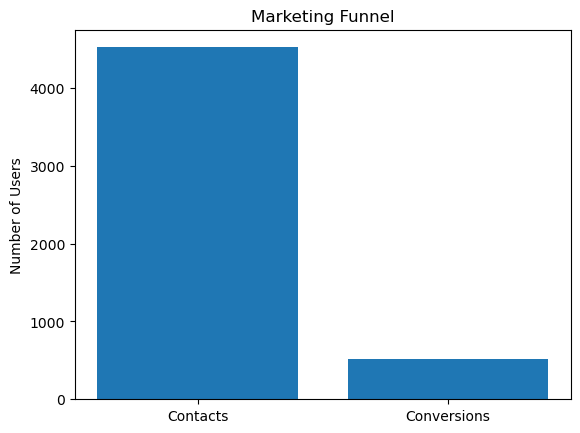

In [9]:
#Funnel Visualization
#Basic Funnel Bar Chart
stages = ['Contacts', 'Conversions']
values = [total_contacts, total_conversions]

plt.figure()
plt.bar(stages, values)
plt.title("Marketing Funnel")
plt.ylabel("Number of Users")
plt.show()

In [10]:
#Drop-Off Calculation
drop_off_rate = 100 - conversion_rate
drop_off_rate

88.47600088476001

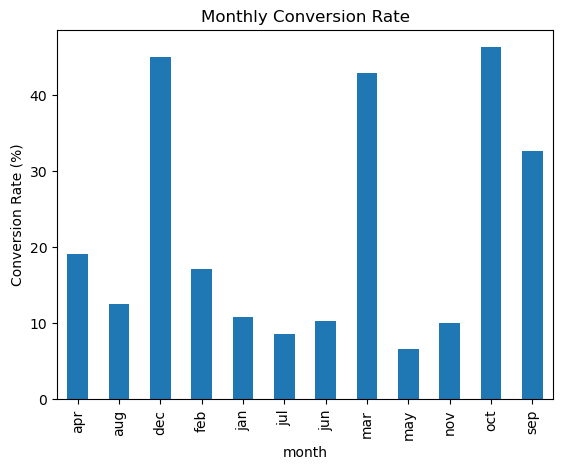

In [11]:
#Monthly Trend Analysis
monthly_conv = df.groupby('month')['y'].apply(lambda x: (x=='yes').mean()*100)

plt.figure()
monthly_conv.plot(kind='bar')
plt.title("Monthly Conversion Rate")
plt.ylabel("Conversion Rate (%)")
plt.show()